#In the cell below
#Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import time
import sys 
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook.
**Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
arch=pd.read_csv('C:\\Users\\Nour Muayad\\Downloads\\twitter-archive-enhanced.csv')

In [3]:
arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [4]:
arch=arch.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'])

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
tweet_ids= list(arch.tweet_id)

# 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit= True)

In [ ]:
#Creating dictionary where errors occured while scraping with some tweet_id will be stored and the causes of the error
error_dict = {}
#We want to estimate the time used for scraping
#start time
start = time.time()
#Writing the data as tweet_json.txt
with open('tweet_json.txt',mode = 'w') as file:
    for i,tweet_id in enumerate(tweet_ids):
        try:
            status = api.get_status(tweet_ids[i],tweet_mode = 'extended')
            #dumping the json file.
            json.dump(status._json,file)
            #writing it line by line.
            file.write('\n')
            #To know if a particular id has been successfully been scraped.
            print(f'Index {i} with tweet id {tweet_id} has successfully been written.')
        except:
            #To know if a particular id is having error while scraping
            print(f'Index {i} with tweet id {tweet_id} cannot be written.')
            #reading all forms of error occurred into the error_dict created above
            e = sys.exc_info()[0]
            error_dict[i,tweet_id] = e
            pass
#end time
end = time.time()
#calculating the estimated time in minutes.
print(f'it uses {end - start} seconds which is {(end - start) / 60} minutes.')


In [7]:
df_list =[]
with open ('tweet_json.txt')as file:
    for line in file:
        df_list.append(json.loads(line))

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2210 (char 2209)

In [8]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [9]:
tweet_data=pd.DataFrame(df_list ,columns=['id','retweet_count','favorite_count'])

In [10]:
tweet_data=tweet_data.rename(columns={'id':'tweet_id'})

In [11]:
tweet_data.to_csv('tweet_data.csv', index=False)

In [12]:
tweet_img=pd.read_csv('image-predictions.tsv', sep='\t')

In [13]:
tweet_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [69]:
tweet_img.loc[1974,'jpg_url']

'https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg'

In [70]:
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg')

In [71]:
tweet_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  6225 non-null   object 
 1   jpg_url   6225 non-null   object 
 2   img_num   6225 non-null   int64  
 3   pred      6225 non-null   int64  
 4   dog       6225 non-null   object 
 5   conf      6225 non-null   float64
 6   result    6225 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 298.0+ KB


# Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

    **Quality issue:
    1-Timestamp should be in datetime format.
    2-change the Type of tweet_id to sttring
    3-Dog Name not mention in Name coulumns 
    4-Some Dog stage not mentioned in the coulumns insted its mention on the text
    5-drop  un-neccecary columns like(       'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'          ,'expanded_urls')
    6-exectract dog gender from text columns.

    7-Use regex to extract the source (Twitter for iPhone, Twitter Web Client, or TweetDeck) from source colum
    8-use pd.cut to get good indecation for rating_numerator

**Tidiness issue
 
1-floofer, doggo, puppo, pupper are in different columns and they are supposed to be in one column
2-The 9 columns of predictions can be presented in more clear form.
3- all dataset should be merged together.


In [17]:
#ISSUE ONE:change the Type of tweet_id to steing

*DEFINE

In [18]:
temperory=[arch ,tweet_img,tweet_data]
for i in temperory:
    i.tweet_id=i.tweet_id.astype(str)

#Test

In [19]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        869 non-null    object
 1   retweet_count   869 non-null    int64 
 2   favorite_count  869 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ KB


In [20]:
tweet_img.sample()p1	

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1747,823322678127919110,https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg,2,cowboy_boot,0.990253,False,Chihuahua,0.001836,True,papillon,0.001274,True


##issue 2
The 9 columns of predictions can be presented in more clear form.

Define 
by rename the coulumns (easy to read )
use pd.wide_to_long

Code

In [21]:
tweet_img=tweet_img.rename(columns={'p1':'dog_1', 'p1_conf':'conf_1', 'p1_dog':'result_1', 
                                        'p2':'dog_2', 'p2_conf':'conf_2', 'p2_dog':'result_2', 
                                        'p3':'dog_3', 'p3_conf':'conf_3', 'p3_dog':'result_3'})

In [22]:
tweet_img.sample()

,tweet_id,jpg_url,img_num,dog_1,conf_1,result_1,dog_2,conf_2,result_2,dog_3,conf_3,result_3
1097,720340705894408192,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False


In [23]:
tweet_img = pd.wide_to_long(tweet_img, stubnames=['dog', 'conf', 'result'], 
                             i=['tweet_id', 'jpg_url', 'img_num'], j='pred', sep="_").reset_index()

Test

In [24]:
tweet_img.sample()

,tweet_id,jpg_url,img_num,pred,dog,conf,result
4031,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,1,3,golden_retriever,0.024972,True


# issue 3
Timestamp must be datetime type

#code

In [25]:
arch['timestamp']=pd.to_datetime(arch['timestamp'])
arch['timestamp'] = arch['timestamp'].dt.strftime('%Y-%m')

Test

In [26]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   object
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(2), object(9)
memory usage: 202.6+ KB


# Isuue 4
extract some of dog_stage from text coulumns

#code

In [27]:
for index, row in arch.iterrows():
    # check if the 'text' column contains 'floofer'
    if 'floofer' in row['text']:
        arch.at[index, 'dog_stage'] = 'floofer'
    # check if the 'text' column contains 'doggo'
    if 'doggo' in row['text']:
        arch.at[index, 'dog_stage'] = 'doggo'
print(arch)

                tweet_id timestamp  \
0     892420643555336193   2017-08   
1     892177421306343426   2017-08   
2     891815181378084864   2017-07   
3     891689557279858688   2017-07   
4     891327558926688256   2017-07   
...                  ...       ...   
2351  666049248165822465   2015-11   
2352  666044226329800704   2015-11   
2353  666033412701032449   2015-11   
2354  666029285002620928   2015-11   
2355  666020888022790149   2015-11   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a hre

# issue 5
strip al html anchor and reyurn just text then make type as category
href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>


code

In [28]:
arch.source = arch.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


C:\Users\Nour Muayad\AppData\Local\Temp\ipykernel_14892\2588634400.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  arch.source = arch.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


Test

In [29]:
arch.source.astype('category')

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: category
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

In [30]:
arch.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [31]:
arch['text'] = arch.text.str.replace("&amp;", "&")
arch['text'] = arch.text.str.replace("\n", " ")
arch['text'] = arch.text.str.replace(r"http\S+", "")
arch['text'] = arch.text.str.strip()

C:\Users\Nour Muayad\AppData\Local\Temp\ipykernel_14892\2945265171.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  arch['text'] = arch.text.str.replace(r"http\S+", "")


In [32]:
arch

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None,NaN
2352,666044226329800704,2015-11,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None,NaN
2353,666033412701032449,2015-11,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None,NaN
2354,666029285002620928,2015-11,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None,NaN


# Issue 5
extract dog name from text  coulumns and add it to name coulmns

#code

In [33]:
def extract_name_from_text(row):
    try:
        if 'This is' in row['text']:
            name = re.search('This is ([A-Z]\w+)',row['text']).group(1)
        elif 'Meet' in row.text:
            name = re.search('Meet ([A-Z]\w+)', row['text']).group(1)
        elif 'Say hello to' in row.text:
            name = re.search('Say hello to ([A-Z]\w+)', row['text']).group(1)
        elif 'named' in row.text:
            name = re.search('named ([A-Z]\w+)', row['text']).group(1)
        else:
            name = ''
    except AttributeError:
        name = ''
    return name


In [34]:
arch['name'] = arch.apply(extract_name_from_text, axis=1)

Test

In [35]:
arch.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1206,715758151270801409,2016-04,Vine - Make a Scene,This is old now but it's absolutely heckin fan...,13,10,,None,None,None,None,NaN
1984,672902681409806336,2015-12,Twitter for iPhone,This is Jimison. He's stuck in a pot. Damn it ...,9,10,Jimison,None,None,None,None,NaN
906,758041019896193024,2016-07,Twitter for iPhone,Teagan reads entire books in store so they're ...,9,10,,None,None,None,None,NaN
659,791406955684368384,2016-10,Twitter for iPhone,Say hello to Levi. He's a Madagascan Butterbop...,12,10,Levi,None,None,None,None,NaN
417,822489057087389700,2017-01,Twitter for iPhone,This is Paisley. She really wanted to be presi...,13,10,Paisley,None,None,None,None,NaN
279,839990271299457024,2017-03,Twitter for iPhone,Meet Sojourner. His nose is a Fibonacci Spiral...,13,10,Sojourner,None,None,None,None,NaN
1746,679132435750195208,2015-12,Twitter for iPhone,This is Louis. He's a river dancer. His friend...,10,10,Louis,None,None,None,None,NaN
368,828708714936930305,2017-02,Twitter for iPhone,This is Fiona. She's an exotic dog. Seems rath...,10,10,Fiona,None,None,None,None,NaN
1846,675822767435051008,2015-12,Twitter for iPhone,🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s,10,10,,None,None,None,None,NaN
2071,671115716440031232,2015-11,Twitter for iPhone,"Meet Phred. He isn't steering, looking at the ...",6,10,Phred,None,None,None,None,NaN


# issue 5
extract dog gender from text

# code

In [36]:
def gender_type (row):
    if 'He'in row['text']:
        gender='M'
    elif 'She'in row['text']:
        gender='F'
    else:
        gender=''
    return gender


make gender as category to use it in upcoming 

In [37]:
arch['gender']=arch.apply(gender_type, axis=1)
arch['gender'].astype('category')

0       M
1       F
2       M
3       F
4       M
       ..
2351    M
2352     
2353    M
2354     
2355    M
Name: gender, Length: 2356, dtype: category
Categories (3, object): ['', 'F', 'M']

# Issue 6
extrcat some of dog stage from text coulumns 

# code

In [38]:
def stage_type (row):
    if 'doggo' in row['text'].lower():
        stage='doggo'
    elif  'floof' in row['text'] .lower():
        stage='floof'
    elif 'pupper'in row['text'].lower():
        stage='pupper'
    elif 'puppo'in row['text'].lower():
        stage='puppo'
    else:
        stage=''
    return stage
        

In [39]:
arch['stage']=arch.apply(stage_type, axis=1)


# Test

In [40]:
arch.sample(20)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,gender,stage
2190,668960084974809088,2015-11,Twitter for iPhone,Meet Jaycob. He got scared of the vacuum. Hide...,10,10,Jaycob,None,None,None,None,NaN,M,
981,749417653287129088,2016-07,Twitter for iPhone,This is Finn. He's the most unphotogenic puppe...,11,10,Finn,None,None,pupper,None,NaN,M,pupper
1832,676191832485810177,2015-12,Twitter for iPhone,These two pups just met and have instantly bon...,10,10,,None,None,None,None,NaN,,
1014,747204161125646336,2016-06,Twitter for iPhone,This is Clark. He's deadly af. Clearly part sh...,10,10,Clark,None,None,None,None,NaN,M,
1660,683078886620553216,2016-01,Twitter for iPhone,Here we see a nifty leaping pupper. Feet look ...,9,10,,None,None,pupper,None,NaN,M,pupper
1535,689977555533848577,2016-01,Twitter for iPhone,Happy Wednesday here's a pup wearing a beret. ...,12,10,,None,None,None,None,NaN,,
2040,671544874165002241,2015-12,Twitter for iPhone,Interesting dog here. Very large. Purple. Mani...,6,10,,None,None,None,None,NaN,,
991,748699167502000129,2016-07,Twitter for iPhone,Meet Tripp. He's being eaten by a sherk and do...,11,10,Tripp,None,None,None,None,NaN,M,
1997,672591271085670400,2015-12,Twitter for iPhone,Lots of pups here. All are Judea Hazelnuts. Ex...,8,10,,None,None,None,None,NaN,,
830,768855141948723200,2016-08,Twitter for iPhone,This is Jesse. He really wants a belly rub. Wi...,11,10,Jesse,None,None,None,None,NaN,M,


# issue 7
rating not follow any standerd and unable to meaure 

In [41]:
arch.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [42]:
arch.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

# code 
pd.cut will help to get good indecation about rating 

In [43]:
arch['rating']=arch.rating_numerator/arch.rating_denominator
arch['rating_cat']=pd.cut(arch.rating,bins=[0.0, np.percentile(arch.rating,25),np.percentile(arch.rating,50),np.percentile(arch.rating,75),np.max(arch.rating)],labels=['Low','Below_average','Above_average','High'])

# Test

In [44]:
arch

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,gender,stage,rating,rating_cat
0,892420643555336193,2017-08,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN,M,,1.3,High
1,892177421306343426,2017-08,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,NaN,F,,1.3,High
2,891815181378084864,2017-07,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,NaN,M,,1.2,Above_average
3,891689557279858688,2017-07,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN,F,,1.3,High
4,891327558926688256,2017-07,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,NaN,M,,1.2,Above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,,None,None,None,None,NaN,M,,0.5,Low
2352,666044226329800704,2015-11,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,,None,None,None,None,NaN,,,0.6,Low
2353,666033412701032449,2015-11,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,,None,None,None,None,NaN,M,,0.9,Low
2354,666029285002620928,2015-11,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,,None,None,None,None,NaN,,,0.7,Low


In [45]:
arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

# Visualization

# Dog Gender

<Axes: >

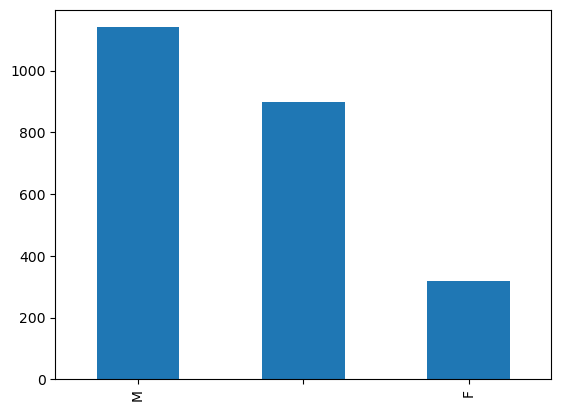

In [46]:
arch.gender.value_counts().plot(kind='bar')

its show the the most dog was Male

# Tweet Source


<Axes: >

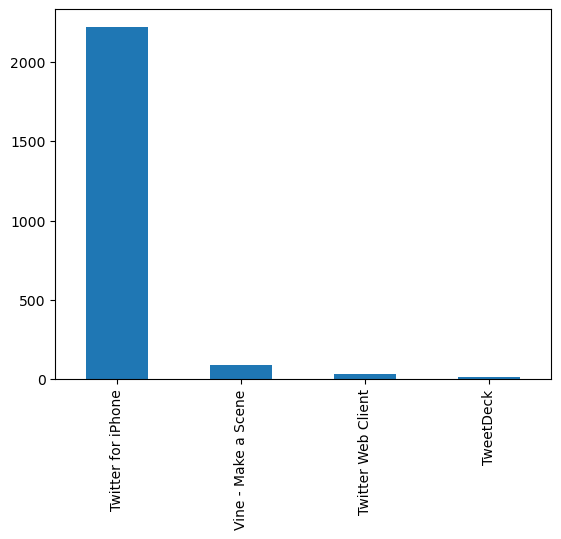

In [47]:
arch.source.value_counts().plot(kind='bar')

its show the most tweet source was from Iphone

# issue 7
merge all dog satge in one columns using melt

In [48]:
arch_copy=arch[['tweet_id','doggo','floofer','pupper','puppo','stage']]

In [49]:
arch_copy.sample(50)

,tweet_id,doggo,floofer,pupper,puppo,stage
817,770772759874076672,None,None,None,None,
1880,675006312288268288,None,None,pupper,None,pupper
544,805932879469572096,None,None,None,None,
2015,672205392827572224,None,None,pupper,None,pupper
1060,741438259667034112,None,None,None,None,
1418,698355670425473025,None,None,None,None,
1679,682032003584274432,None,None,None,None,
862,762699858130116608,None,None,None,None,
2064,671154572044468225,None,None,None,None,
933,753655901052166144,None,None,None,None,


In [50]:
arch_copy.loc[822,'pupper'] = 'None'

C:\Users\Nour Muayad\AppData\Local\Temp\ipykernel_14892\3104650039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arch_copy.loc[822,'pupper'] = 'None'


In [51]:
arch_copy.loc[822]

tweet_id    770093767776997377
doggo                    doggo
floofer                   None
pupper                    None
puppo                     None
stage                    doggo
Name: 822, dtype: object

In [52]:
arch_melt=pd.melt(arch_copy,id_vars='tweet_id',value_vars=['doggo','floofer','pupper','puppo','stage'], value_name='dog_stage')
arch_melt

,tweet_id,variable,dog_stage
0,892420643555336193,doggo,None
1,892177421306343426,doggo,None
2,891815181378084864,doggo,None
3,891689557279858688,doggo,None
4,891327558926688256,doggo,None
...,...,...,...
11775,666049248165822465,stage,
11776,666044226329800704,stage,
11777,666033412701032449,stage,
11778,666029285002620928,stage,


In [53]:
arch_melt.drop('variable', axis=1, inplace=True)
arch_melt=arch_melt.query('dog_stage !="None"')

In [54]:
arch_melt.sample(30)

,tweet_id,dog_stage
11552,670303360680108032,
11669,667885044254572545,
11130,680805554198020098,
11070,683834909291606017,pupper
9681,843856843873095681,
10901,693622659251335168,
10441,746872823977771008,
10394,750117059602808832,
9999,801115127852503040,doggo
9941,810896069567610880,


In [55]:
arch_final= pd.merge(arch, arch_melt, on='tweet_id', how='left')

# Test

In [56]:
arch_final.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage_x,gender,stage,rating,rating_cat,dog_stage_y
2260,674743008475090944,2015-12,Twitter for iPhone,This is Sophie. She just saw a spider. 10/10 d...,10,10,Sophie,None,None,None,None,NaN,F,,1.0,Low,
1416,719704490224398336,2016-04,Twitter for iPhone,This is Clyde. He's making sure you're having ...,12,10,Clyde,None,None,pupper,None,NaN,M,pupper,1.2,Above_average,pupper
844,783839966405230592,2016-10,Twitter for iPhone,This is Riley. His owner put a donut pillow ar...,13,10,Riley,None,None,None,None,NaN,,,1.3,High,


In [57]:
arch_final.drop(['doggo','floofer','pupper','puppo','stage'], axis=1 , inplace=True)

In [58]:
arch_final.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage_x,gender,rating,rating_cat,dog_stage_y
1150,750429297815552001,2016-07,Twitter for iPhone,This is Arnie. He's a Nova Scotian Fridge Floo...,12,10,Arnie,NaN,M,1.2,Above_average,floof


In [59]:
arch_final.drop(['rating_numerator','rating_denominator'], axis=1,inplace=True)

In [60]:
arch_final.sample(4)

,tweet_id,timestamp,source,text,name,dog_stage_x,gender,rating,rating_cat,dog_stage_y
1199,747844099428986880,2016-06,Twitter for iPhone,This is Huxley. He's pumped for #BarkWeek. Eve...,Huxley,NaN,M,1.1,Below_average,
1593,705066031337840642,2016-03,Twitter for iPhone,This is Reese. He's a Chilean Sohcahtoa. Loves...,Reese,NaN,M,1.2,Above_average,
943,773547596996571136,2016-09,Twitter for iPhone,This is Chelsea. She forgot how to dog. 11/10 ...,Chelsea,NaN,F,1.1,Below_average,pupper
870,780931614150983680,2016-09,Twitter for iPhone,I want to finally rate this iconic puppo who t...,,NaN,,1.3,High,puppo


# Merge all DataSet in one DataSet

In [61]:
grand=pd.merge(arch_final ,tweet_data, on='tweet_id', how='left')

In [62]:
grand=pd.merge(grand, tweet_img , on='tweet_id', how='left')

In [63]:
grand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 0 to 7564
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        7565 non-null   object  
 1   timestamp       7565 non-null   object  
 2   source          7565 non-null   object  
 3   text            7565 non-null   object  
 4   name            7565 non-null   object  
 5   dog_stage_x     550 non-null    object  
 6   gender          7565 non-null   object  
 7   rating          7565 non-null   float64 
 8   rating_cat      7559 non-null   category
 9   dog_stage_y     7565 non-null   object  
 10  retweet_count   2711 non-null   float64 
 11  favorite_count  2711 non-null   float64 
 12  jpg_url         7224 non-null   object  
 13  img_num         7224 non-null   float64 
 14  pred            7224 non-null   float64 
 15  dog             7224 non-null   object  
 16  conf            7224 non-null   float64 
 17  result        

# Retweet and favorite count

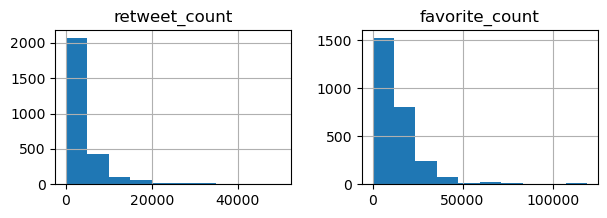

In [64]:
gragh=grand[['retweet_count', 'favorite_count','rating_cat']]
gragh.hist(figsize=(7,2));

# Prediction Results

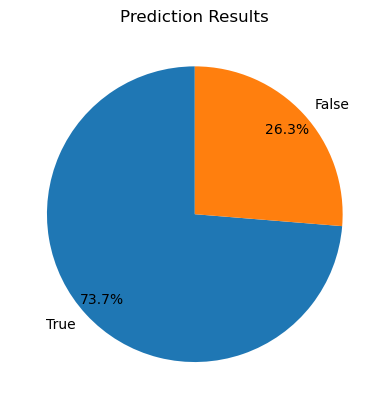

In [65]:

results = grand.result.value_counts()
plt.pie(results, labels=results.index, autopct='%1.1f%%', startangle=90,
         pctdistance=0.85,labeldistance=1.1)
plt.title('Prediction Results');

True perduction has almost 75%

# How can Number of images affects the confidence

<Axes: xlabel='img_num', ylabel='conf'>

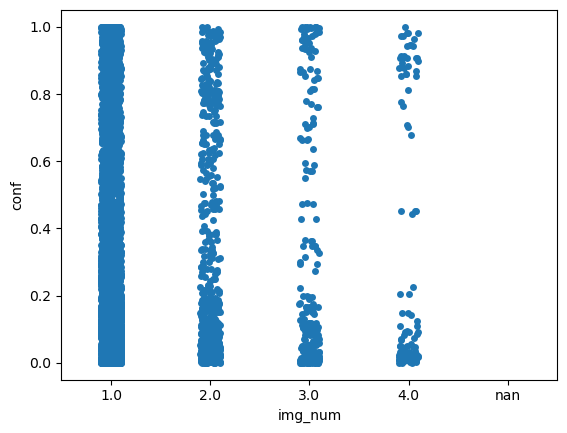

In [66]:
sns.stripplot(data=grand,x='img_num',y='conf')

# Our top Dog stage

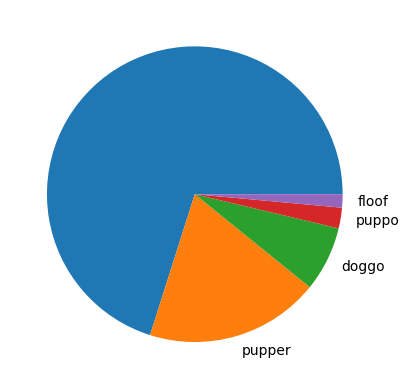

In [67]:
dog_st=grand.dog_stage_y.value_counts()[:5]
plt.pie(dog_st,labels=dog_st.index)
plt.title=('Dog stages');
plt.show()

pupper is the Top one dog stage exist

# #######Conslusions
#1- Male dog is the most
#2- tweeter for PIphone is the most
#3-pupper the most appear in tweet dataset
#4-75% of the results are True
#5-Most of the high confidence results were based on 1 imag